# Pymaceuticals Inc.
---

### Analysis

- On average, Capomulin and Ramicane were able to lower the tumor volume most effectively. These were also the two drugs used the most in the study. When using Capomulin, mice that were lighter in weight tended to have the greatest positive impact. One potential downfall to the study was that there were slightly more male mice observed than female mice. This is a small detail, but perhaps could have added some bias towards the study.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_count = study_data_complete["Mouse ID"].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete['Mouse ID'] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989 = study_data_complete[study_data_complete['Mouse ID'] == "g989"].index
study_data_complete.drop(g989, inplace = True)
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
new_count = study_data_complete["Mouse ID"].nunique()
new_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = study_data_complete[["Drug Regimen", "Tumor Volume (mm3)"]]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_group = summary.groupby(["Drug Regimen"])

mean_tv = summary_group["Tumor Volume (mm3)"].mean()
median_tv = summary_group["Tumor Volume (mm3)"].median()
variance_tv = summary_group["Tumor Volume (mm3)"].var()
std_tv = summary_group["Tumor Volume (mm3)"].std()
sem_tv = summary_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_data = pd.DataFrame({"Mean Tumor Volume" : mean_tv, "Median Tumor Volume" : median_tv, "Tumor Volume Variance" : variance_tv, "Tumor Volume Standard Deviation" : std_tv, "Tumor Volume SEM" : sem_tv})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

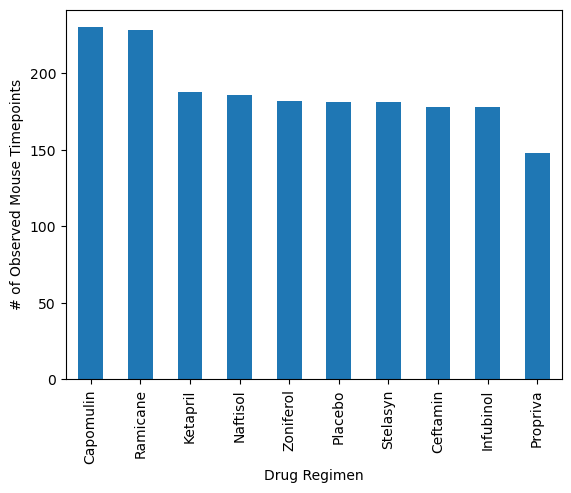

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_df = study_data_complete[["Mouse ID", "Drug Regimen"]]
bar_df_group = bar_df.groupby(["Drug Regimen"]).count()
bar_sorted = bar_df_group.sort_values("Mouse ID", ascending=False)
bar_chart = bar_sorted.plot(kind='bar', legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

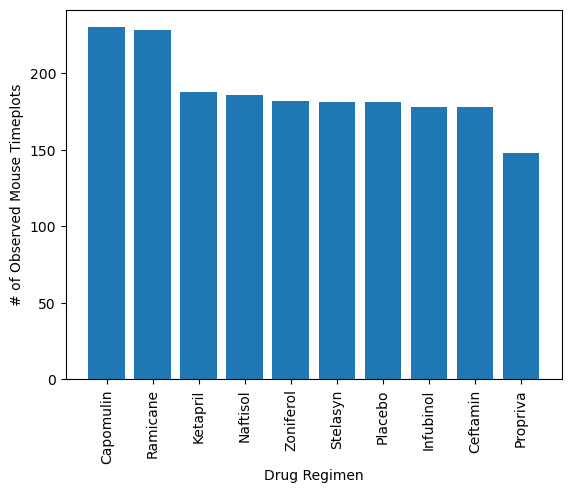

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = study_data_complete["Drug Regimen"].value_counts().index
y_axis = study_data_complete["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timeplots")
plt.xticks(x_axis, rotation=90)
plt
plt.show()

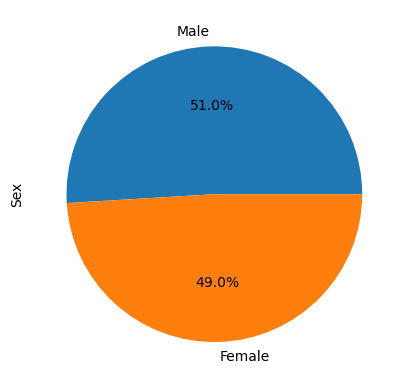

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = study_data_complete["Sex"].value_counts()
pie_df = pd.DataFrame(pie_data)
pie_chart = pie_df.plot(kind='pie', autopct="%1.1f%%", subplots=True, legend=False)
plt.show()

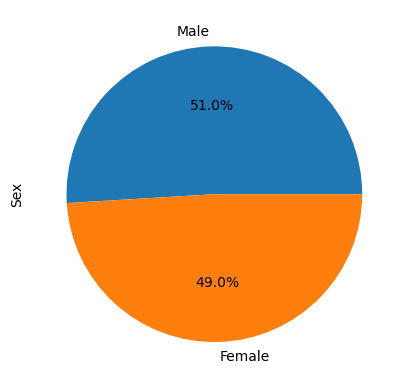

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = study_data_complete["Sex"].value_counts()
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
QOB_df = study_data_complete[study_data_complete["Drug Regimen"].isin(drug_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
grouped_timepoint = QOB_df.groupby(['Mouse ID']).max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_timepoint, QOB_df, on=("Mouse ID", "Timepoint"), how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatments:
    tumor_data = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(upper_bound)
    print(lower_bound)
    
    # Knowing the upper and lower bounds I was able to determine outliers, I could not figure out how to get it to work in the for loop. The only outlier was in Infubinol and it was mouse c326.
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_outliers = capomulin_df.loc[((capomulin_df["Tumor Volume (mm3)"] > 51.8320159) | (capomulin_df["Tumor Volume (mm3)"] < 20.70456164999999))]
ramicane_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
ramicane_outliers = ramicane_df.loc[((ramicane_df["Tumor Volume (mm3)"] > 54.30681135) | (ramicane_df["Tumor Volume (mm3)"] < 17.912664470000003))]
infubinol_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
infubinol_outliers = infubinol_df.loc[((infubinol_df["Tumor Volume (mm3)"] > 82.74144559000001) | (infubinol_df["Tumor Volume (mm3)"] < 36.83290494999999))]
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]
ceftamin_outliers = ceftamin_df.loc[((ramicane_df["Tumor Volume (mm3)"] > 87.66645829999999) | (ceftamin_df["Tumor Volume (mm3)"] < 25.355449580000002))]
print(capomulin_outliers)
print(ramicane_outliers)
print(infubinol_outliers)
print(ceftamin_outliers)



51.83201549
20.70456164999999
54.30681135
17.912664470000003
82.74144559000001
36.83290494999999
87.66645829999999
25.355449580000002
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


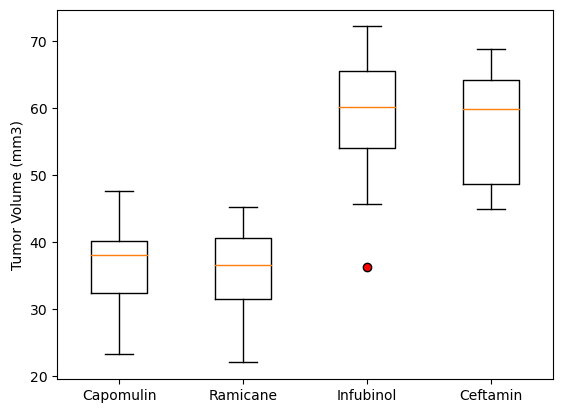

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dot = dict(markerfacecolor='r', marker='o')
plt.subplots()
plt.boxplot(tumor_vol, labels = treatments, flierprops = dot)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

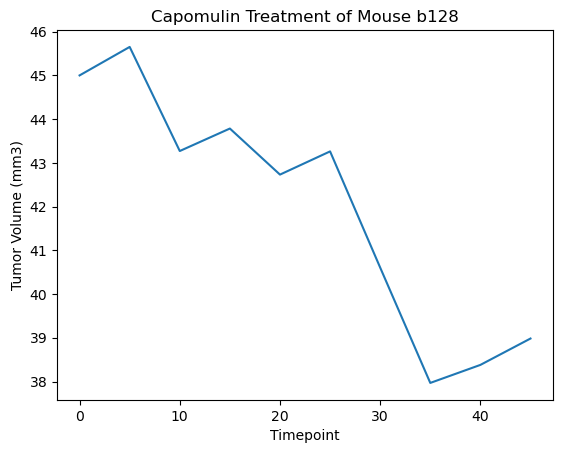

In [216]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128 = study_data_complete.loc[study_data_complete['Mouse ID'] == "b128"]
b128 = b128[['Tumor Volume (mm3)', 'Timepoint']]
b128.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

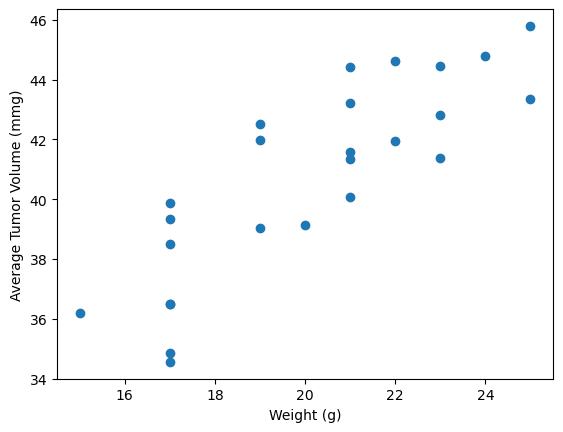

In [217]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"]
capomulin_grouped = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
df = pd.DataFrame(capomulin_grouped)
cap_group = capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()
df2 = pd.DataFrame(cap_group)
y_axis = df['Tumor Volume (mm3)']
x_axis = df2['Weight (g)']
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mmg)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


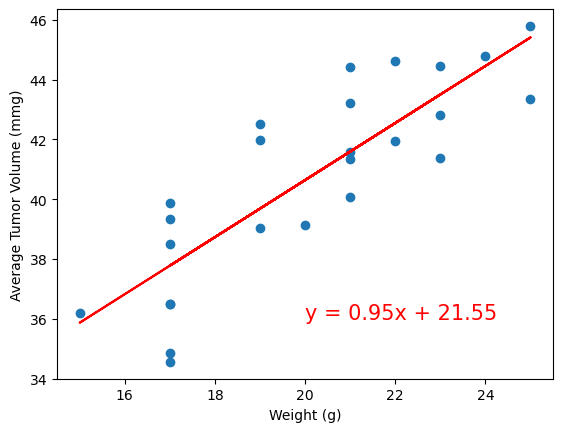

In [222]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mmg)")
plt.show()